# Tarea 1: Series Tiempo dataset

## Leer dataset

Los datos fueron obtenidos de la biblioteca de Keggle: [https://www.kaggle.com/datasets/thomaswrightanderson/river-aire-discharge-time-series?resource=download]

In [12]:
import pandas as pd

# Ruta al archivo .csv 
csv_file_path = "C:/Users/FBA/OneDrive - Acesco/0. Personales/2. Profesional/20240416 - Maestria en Analítica de Datos/20240919 Series de Tiempo/Tarea 1/Parte 1/river_aire_discharge_timeseries.csv"

# Lee el archivo .csv en un DataFrame
df = pd.read_csv(csv_file_path)

# Muestra las primeras filas del DataFrame
print(df.head(1))

         Date  SF_absolute_humidity  SF_relative_humidity  \
0  14/11/2017                   8.3                  86.2   

   SF_mean_air_temperature  SF_atmospheric_pressure  SF_potential_evaporation  \
0                     10.4                   1013.1                       0.4   

   SF_net_radiation  SF_volumetric_water_content  SF_soil_temperature  \
0               0.8                         32.4                  6.9   

   SF_wind_speed  ...  river_level_snaygill  river_level_kildwick  \
0            2.9  ...                 0.417                 0.366   

   river_level_kirkstall  headingley_precipitation  malham_precipitation  \
0                  1.514                       1.4                   9.6   

   skipton_snaygill_precipitation  farnley_hall_precipitation  \
0                             0.8                         0.8   

   embsay_precipitation  silsden_precipitation  lower_laithe_precipitation  
0                   6.6                    1.2                     

## Gráficos

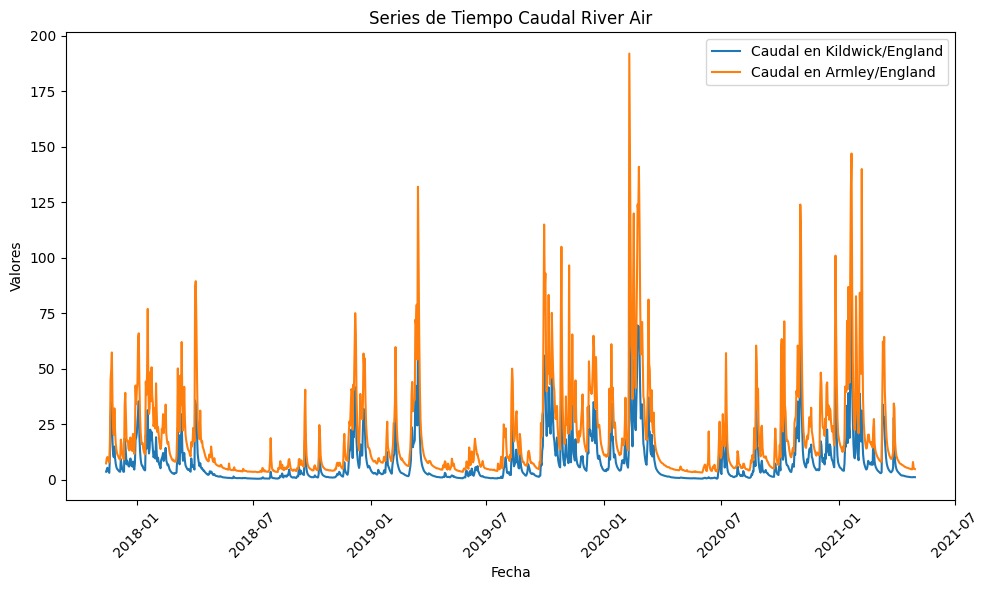

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv(csv_file_path)

# Convertir la columna de fechas al formato de fecha
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Configurar la columna 'Date' como índice
df.set_index('Date', inplace=True)

# Crear una figura y ejes para varias series de tiempo
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar series de tiempo
ax.plot(df.index, df['discharge_kildwick'], label='Caudal en Kildwick/England')
ax.plot(df.index, df['discharge_armley'], label='Caudal en Armley/England')

# Personalizar gráfico
ax.set_title('Series de Tiempo Caudal River Air')
ax.set_xlabel('Fecha')
ax.set_ylabel('Discharge')
ax.legend()

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

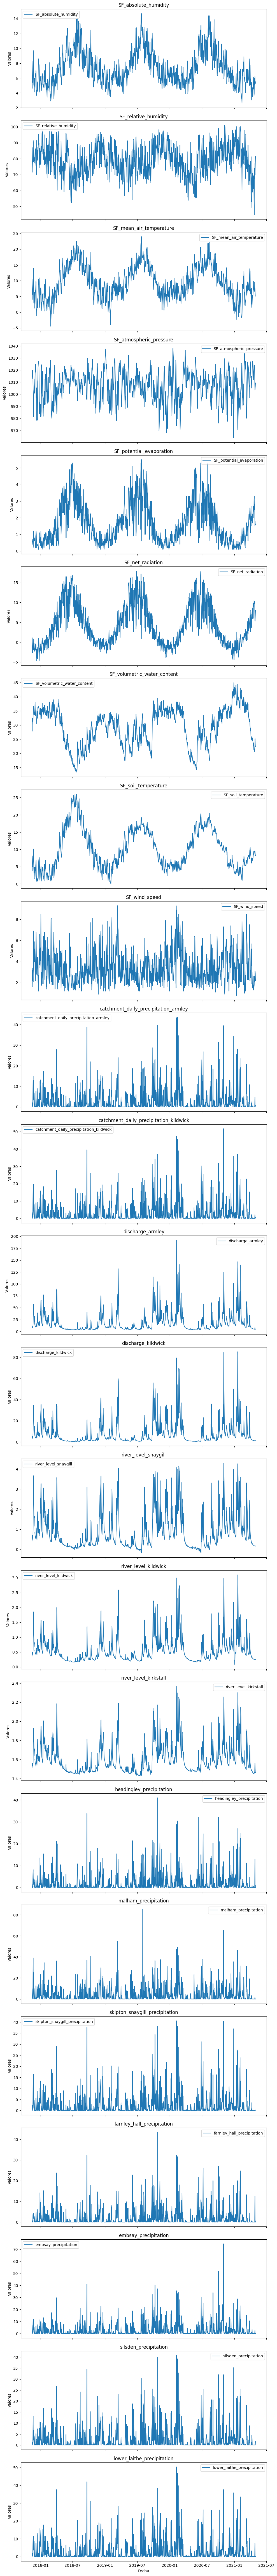

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(csv_file_path)

# Crear una figura y varios ejes
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 4 * num_columns), sharex=True)

# Si solo hay un gráfico, axes será un objeto, no una lista, así que lo convertimos en lista
if num_columns == 1:
    axes = [axes]

# Graficar cada columna en su propio gráfico
for ax, column in zip(axes, df.columns):
    ax.plot(df.index, df[column], label=column)
    ax.set_title(column)
    ax.set_ylabel('Valores')
    ax.legend()

# Ajustar el diseño
plt.xlabel('Fecha')
plt.tight_layout()

# Mostrar gráfico
plt.show()


## Interpretación inicial

En general el caudal de un río dependerá signficativamente de la localidad en donde éste se mida. Sin embargo las fluctuaciones del mismo serán proporcionales en cada zona.

De las conclusiones preliminales que podemos observar en este tipo de datos de series temporales, es la estacionalidad y movimientos ciclicos de las variables medidas que se repiten con una regularidad, claramente marcada por los periodos de incremento y disminución de la pluviosidad en cada estación. 

Particularment, los datos observados corresponden a un rio en inglaterrra donde los bajos caudales concuerdan con las estaciones del Verano y otoño entre los meses de abril a noviembre. Los picos en los caudales corresponden a las estaciones de invierno y primavera, la cual se dá entre los meses de diciembre a marzo. 

https://www.npl.co.uk/resources/q-a/when-do-the-four-seasons-begin